### Feature Engineering

#### features to keep:
* asin
* title
* brand
* Rating
* reviewerID
* reviewTime
* reviewText + summary
* genre

In [2]:
import pandas as pd

In [65]:
data = pd.read_csv('data_with_genre.csv')
data = data[['asin', 'title', 'brand', 'genre', 'Rating', 
             'reviewerID', 'summary','reviewText', 'reviewTime']]

/Users/moyang/.pyenv/versions/3.7.1/envs/amazon_project/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Preprocessing

In [53]:
data.isna().sum()

asin              0
title             0
brand             0
genre         90046
Rating            0
reviewerID        0
summary           0
reviewText        0
reviewTime        0
dtype: int64

In [57]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def remove_punc(text):
    for punc in string.punctuation:
        text = text.replace(punc, '')
    return text.lower()

def remove_digit(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text.lower()  

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word.lower() for word in word_tokenize(text) if not word in stop_words])
    return text

def lemmatizer(text):
    lst = [WordNetLemmatizer().lemmatize(word.lower()) for word in word_tokenize(text)]
    return (' '.join(lst))


In [58]:
# data[['summary', 'reviewText']] = data[['summary', 'reviewText']].applymap(remove_punc)
# data[['summary', 'reviewText']] = data[['summary', 'reviewText']].applymap(remove_digit)
# data[['summary', 'reviewText']] = data[['summary', 'reviewText']].applymap(remove_stopwords)
# data[['summary', 'reviewText']] = data[['summary', 'reviewText']].applymap(lemmatizer)

### Greate a meta data column

Merge **genre | brand** column as **meta** column

In [66]:
data.fillna("", inplace = True)

In [67]:
data['metada'] = data[['brand', 'genre']].apply(lambda x: " ".join(x), axis = 1)

In [91]:
title_df = data[~ data[['title', 'asin', 'metada']].duplicated()]

In [98]:
title_df

,asin,title,brand,genre,Rating,reviewerID,summary,reviewText,reviewTime,metada,merged_summary,meta_summary
0,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,5.0,A3UH4ZYS5HKBNR,It works,Love it it brought back hella memories,"12 16, 2017",nintendo Action-adventure,it works game keeps messing up it will play fo...,nintendo Action-adventure it works game keeps ...
630,B00000J97G,game boy color,nintendo,,5.0,AA23DFKNTM7VK,Comes in real handy!,I am a 17 year old gamer. I started out with t...,"08 16, 2000",nintendo,comes in real handy important for those torn b...,nintendo comes in real handy important for th...
1271,B00000JRSB,final fantasy vii,squaresoft,Role-playing,1.0,A16FEXIKAPT24U,Game disc 1 was cracked,Game disc was cracked thats pretty lame,"01 2, 2018",squaresoft Role-playing,game disc was cracked received this in perfec...,squaresoft Role-playing game disc was cracked...
2394,B00000K4MC,roller coaster tycoon,atari,Construction and management simulation,5.0,A21W0Z3OZ8CHO4,A fun game for everyone to enjoy!,In Roller Coaster Tycoon you build a theme par...,"11 29, 1999",atari Construction and management simulation,a fun game for everyone to enjoy i was hooked ...,atari Construction and management simulation a...
3014,B0000296O5,final fantasy viii,squaresoft,Role-playing,5.0,A2AXQTB83VMK4L,Best RPG Ever!,I'm having the most fun I've ever had on PlayS...,"10 14, 1999",squaresoft Role-playing,best rpg ever stupefyingly phenomenal conditio...,squaresoft Role-playing best rpg ever stupefyi...
...,...,...,...,...,...,...,...,...,...,...,...,...
265564,B01GKGVIB2,titanfall 2,electronic arts,First-person shooter,3.0,A2PBJY89J917EF,I don't hate the game,I honestly do not know why the developers had ...,"10 28, 2016",electronic arts First-person shooter,i dont hate the game yes and all of my yes meh...,electronic arts First-person shooter i dont ha...
267334,B01GW3POY0,resident evil 7: biohazard,capcom,Survival horror,5.0,A2JDSQQZBMVYQD,Great game! Capcom did a great job in going ...,Great game! Capcom did a great job in going ba...,"01 24, 2017",capcom Survival horror,great game capcom did a great job in going ga...,capcom Survival horror great game capcom did a...
268090,B01GW3NY5Q,mass effect andromeda,electronic arts,Action role-playing,1.0,A1U86MCXJLE57H,Trash bag,This game pretty broken! Very buggy and it suf...,"03 21, 2017",electronic arts Action role-playing,trash bag five stars why does this even exist ...,electronic arts Action role-playing trash bag ...
268159,B01GW3ODBU,the elder scrolls v: skyrim special edition,bethesda,Action role-playing,5.0,A37L63XBLWDHM1,Awesome game! Playing it for a 2nd time and a...,"Skyrim was excellent before, i mean truly exce...","10 28, 2016",bethesda Action role-playing,awesome game playing it for a nd time and am ...,bethesda Action role-playing awesome game pla...


### Greate a Content latent matrix from meta data

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(title_df['metada'])
count_df = pd.DataFrame(count_matrix.toarray(), index = title_df.title.tolist())
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
the legend of zelda: ocarina of time,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
game boy color,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
final fantasy vii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
roller coaster tycoon,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
final fantasy viii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
count_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
the legend of zelda: ocarina of time,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
game boy color,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
final fantasy vii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
roller coaster tycoon,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
final fantasy viii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
titanfall 2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
resident evil 7: biohazard,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
mass effect andromeda,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the elder scrolls v: skyrim special edition,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimensionality Reduction

In [103]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=35)
latent_df = svd.fit_transform(count_df)

Plot the ***cumulative explained variance ratio*** as a function of the number components

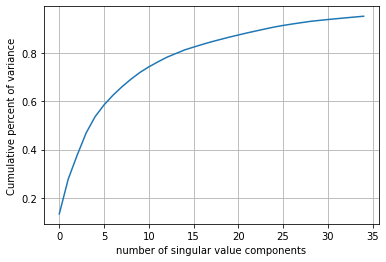

In [104]:
import matplotlib.pyplot as plt

# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

We can see that with only the first 15 components  we can explain more than 80% of the variance, which suffices for our study purposes.

👉**save the 15 first components of this matrix into a new `latent_df` dataframe, indexed by the titles**

In [106]:
n = 15
latent_df = pd.DataFrame(latent_df[:,0:n], index=title_df.title.tolist())
latent_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
the legend of zelda: ocarina of time,0.294292,1.233643,-0.521613,0.144118,0.918829,-0.004616,0.133634,0.077526,0.348778,-0.208370,-0.050667,-0.024226,-0.051992,0.020121,-0.111301
game boy color,0.048856,0.131334,0.073146,-0.117877,0.954564,0.022736,-0.019080,0.009757,-0.032450,0.039011,-0.023633,-0.020946,0.032680,0.016772,0.017698
final fantasy vii,0.171358,0.663350,1.044106,-0.494231,-0.211387,-0.067609,-0.101016,-0.091359,-0.213202,-0.020249,-0.005835,-0.058562,-0.201762,-0.304118,-0.024845
roller coaster tycoon,0.042307,-0.004436,0.073487,0.162396,0.093110,0.015992,0.071190,0.017680,-0.070719,0.064404,0.899574,1.761330,-0.511339,-0.066874,-0.038895
final fantasy viii,0.171358,0.663350,1.044106,-0.494231,-0.211387,-0.067609,-0.101016,-0.091359,-0.213202,-0.020249,-0.005835,-0.058562,-0.201762,-0.304118,-0.024845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
titanfall 2,2.112036,-0.501130,0.156410,0.415706,-0.006022,-0.029424,-0.028792,-0.049488,0.024812,0.003387,-0.264107,0.025573,-0.010923,0.004003,0.004109
resident evil 7: biohazard,0.002610,0.013602,-0.014826,0.007537,-0.004073,-0.037520,-0.055418,-0.019197,-0.086929,0.018834,-0.003123,0.097238,0.338328,0.375484,-0.259220
mass effect andromeda,0.994080,1.193175,1.347433,0.694046,-0.225573,-0.032195,-0.002217,0.013260,-0.026246,-0.200115,0.028415,-0.192457,-0.082736,-0.209851,-0.096795
the elder scrolls v: skyrim special edition,0.339248,1.397033,0.929840,-0.444324,-0.336318,-0.103478,-0.012719,-0.057349,-0.010378,-0.471799,-0.061513,0.254708,0.620977,0.105132,0.131979


### Do Recomendation based on groduct content (cosine similarity)

#### Take 'titanfall 2' as an example

In [112]:
latent_df.index

Index(['the legend of zelda: ocarina of time', 'game boy color ',
       'final fantasy vii', 'roller coaster tycoon ', 'final fantasy viii',
       'super mario world', 'final fantasy ix',
       'metal gear solid 2: sons of liberty', 'halo ', 'grand theft auto iii',
       ...
       'madden nfl 17 ', 'battlefield 1 ', 'battlefield 1 ', 'titanfall 2 ',
       'fifa 17 ', 'titanfall 2 ', 'resident evil 7: biohazard ',
       'mass effect andromeda ',
       'the elder scrolls v: skyrim special edition ',
       'nintendo pokemon go plus'],
      dtype='object', length=311)

In [114]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
example = 'super mario world'
## Get the latent vectors for 'titanfall 2' from content
v1 = np.array(latent_df.loc[example]).reshape(1,-1)

## Compute the cosine similarity of this game with the others in the list
sim1 = cosine_similarity(latent_df, v1).reshape(-1)

### Create a dataframe with the final similarities to the example

In [116]:
dictDf = {'content': sim1}
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)
recommendation_df

,content
the legend of zelda: ocarina of time,0.571392
game boy color,0.999008
final fantasy vii,0.005131
roller coaster tycoon,-0.024553
final fantasy viii,0.005131
...,...
titanfall 2,0.005895
resident evil 7: biohazard,0.028960
mass effect andromeda,0.000885
the elder scrolls v: skyrim special edition,-0.005678


### Sort on content

In [117]:
### use 'super mario world' as example

recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10)

,content
new super mario bros. wii,1.000000
super mario world,1.000000
new super mario bros,1.000000
nintendo wii u deluxe set: super mario bros u &amp; luigi u (32 gb),1.000000
super mario galaxy,1.000000
donkey kong country returns,0.999390
super mario 64 ds,0.999390
super mario sunshine,0.999390
super mario maker,0.999262
mario party 8,0.999134


### Greate a meta data with summary column 

In [68]:
##########################################
### Create a column meged all summary of one product
##########################################

merged_summary_df = pd.DataFrame(data.groupby('asin')['summary'].apply(lambda x: "%s" % " ".join(x)))

In [69]:
data = data.merge(merged_summary_df, on = 'asin', how = 'left')
data.rename(columns = {'summary_x':'summary', 'summary_y': 'merged_summary'}, inplace = True)
data.head()

,asin,title,brand,genre,Rating,reviewerID,summary,reviewText,reviewTime,metada,merged_summary
0,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,5.0,A3UH4ZYS5HKBNR,It works,Love it it brought back hella memories,"12 16, 2017",nintendo Action-adventure,It works Game keeps messing up. It will play f...
1,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,2.0,AFTRRTP5KS5EH,Game keeps messing up. It will play for a ...,Game keeps messing up. It will play for a shor...,"12 14, 2017",nintendo Action-adventure,It works Game keeps messing up. It will play f...
2,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,1.0,A24PND6TK4SWI9,Buyer's beware,"The game was made for a Japanese 64, couldn't ...","12 14, 2017",nintendo Action-adventure,It works Game keeps messing up. It will play f...
3,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,5.0,A3R150UCG36IP1,Five Stars,Rocks!! works perf. arrived quick,"12 12, 2017",nintendo Action-adventure,It works Game keeps messing up. It will play f...
4,B00000DMB3,the legend of zelda: ocarina of time,nintendo,Action-adventure,2.0,ABHZF8KG9FRSA,game sorta works. it plays but save battery in...,game sorta works. it plays but save battery in...,"12 2, 2017",nintendo Action-adventure,It works Game keeps messing up. It will play f...


In [70]:
data['merged_summary'] = data['merged_summary'].map(remove_punc)

In [71]:
data['merged_summary'] = data['merged_summary'].map(remove_digit)

In [73]:
data['meta_summary'] = data[['metada','merged_summary']].apply(lambda x: ' '.join(x), axis = 1)

### Greate a Content latent matrix from meta_summary data

In [125]:
data = data[ ~ data[['title', 'meta_summary']].duplicated()]

In [118]:
count_sa = CountVectorizer(stop_words='english')
count_sa_matrix = count.fit_transform(data['meta_summary'])
count_sa_df = pd.DataFrame(count_matrix.toarray(), index=data.index.tolist())
count_sa_df.head()

NameError: name 'df' is not defined

### Dimensionality reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=25)
latent_df_2 = svd.fit_transform(count_sa_df)

In [ ]:
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()